<a href="https://colab.research.google.com/github/Jin0331/TA/blob/master/DS_Lab_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *8주차 실습*

- - -

![대체 텍스트](http://www.bimatrix.jp/wp-content/uploads/2017/03/37.jpg)

## **1. tidyr - spread, gather**

- - -
https://gomguard.tistory.com/229

In [ ]:
install.packages("data.table")
library(tidyverse)
library(data.table)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
surveys <- fread("https://raw.githubusercontent.com/kbroman/kbroman.github.io/master/datacarp/portal_data_joined.csv") %>% as_tibble()
survers %>% show()

# A tibble: 34,786 x 13
   record_id month   day  year plot_id species_id sex   hindfoot_length weight
       <int> <int> <int> <int>   <int> <chr>      <chr>           <int>  <int>
 1         1     7    16  1977       2 NL         "M"                32     NA
 2        72     8    19  1977       2 NL         "M"                31     NA
 3       224     9    13  1977       2 NL         ""                 NA     NA
 4       266    10    16  1977       2 NL         ""                 NA     NA
 5       349    11    12  1977       2 NL         ""                 NA     NA
 6       363    11    12  1977       2 NL         ""                 NA     NA
 7       435    12    10  1977       2 NL         ""                 NA     NA
 8       506     1     8  1978       2 NL         ""                 NA     NA
 9       588     2    18  1978       2 NL         "M"                NA    218
10       661     3    11  1978       2 NL         ""                 NA     NA
# … with 34,776 more rows, a

```
연구조사 구획에서 포획된 종과 체중을 조사중이다.
각 행별로 각 동물별에 대한 정보가 담겨있는데, 열은 다음을 나타내고 있다:

**
record_id	관측점에 대한 유일무이한 ID
month	관측월
day	관측일
year	관측년
plot_id	구획지에 대한 ID
species_id	2-자리 종족 ID
sex	포획동물 성별 (“M”, “F”)
hindfoot_length	뒷발 길이 (밀리미터)
weight	포획동물 길이 (그램)
genus	포획동물이 속한 속(genus)
species	동물 종족
taxa	설치류(Rodent), 파충류(Reptile), 새(Bird), 토끼(Rabbit) 등
plot_type	구획지 유형
```

In [ ]:
surveys_gw <- surveys %>%
  filter(!is.na(weight)) %>%
  group_by(genus, plot_id) %>%
  summarize(mean_weight = mean(weight)) %>%
  select(plot_id, genus, mean_weight)

surveys_gw %>% show()

# Baiomys : 피그미생쥐
# Chaetodipus : 거친털주머니생쥐
# Dipodomys : 캥거루쥐

# A tibble: 196 x 3
# Groups:   genus [10]
   plot_id genus       mean_weight
     <int> <chr>             <dbl>
 1       1 Baiomys            7   
 2       2 Baiomys            6   
 3       3 Baiomys            8.61
 4       5 Baiomys            7.75
 5      18 Baiomys            9.5 
 6      19 Baiomys            9.53
 7      20 Baiomys            6   
 8      21 Baiomys            6.67
 9       1 Chaetodipus       22.2 
10       2 Chaetodipus       25.1 
# … with 186 more rows


* **spread**

![대체 텍스트](https://datacarpentry.org/R-ecology-lesson/img/spread_data_R.png)

In [ ]:
survers_spread <- surveys_gw %>%
  spread(genus, mean_weight, fill = -99)

survers_spread %>% show()

# A tibble: 24 x 11
   plot_id Baiomys Chaetodipus Dipodomys Neotoma Onychomys Perognathus
     <int>   <dbl>       <dbl>     <dbl>   <dbl>     <dbl>       <dbl>
 1       1    7           22.2      60.2    156.      27.7        9.62
 2       2    6           25.1      55.7    169.      26.9        6.95
 3       3    8.61        24.6      52.0    158.      26.0        7.51
 4       4  -99           23.0      57.5    164.      28.1        7.82
 5       5    7.75        18.0      51.1    190.      27.0        8.66
 6       6  -99           24.9      58.6    180.      25.9        7.81
 7       7  -99           19.9      57.4    170.      23.6        7   
 8       8  -99           20.5      59.4    134.      25.9        7.06
 9       9  -99           18.9      57.5    162.      27.5        7.37
10      10  -99           22.3      51.8    190       28.7      -99   
# … with 14 more rows, and 4 more variables: Peromyscus <dbl>,
#   Reithrodontomys <dbl>, Sigmodon <dbl>, Spermophilus <dbl>


* gather

![대체 텍스트](https://datacarpentry.org/R-ecology-lesson/img/gather_data_R.png)

In [ ]:
 surveys_spread %>%
  gather(key = genus, value = mean_weight, -plot_id) %>% show()

# A tibble: 240 x 3
   plot_id genus   mean_weight
     <int> <chr>         <dbl>
 1       1 Baiomys        7   
 2       2 Baiomys        6   
 3       3 Baiomys        8.61
 4       4 Baiomys       NA   
 5       5 Baiomys        7.75
 6       6 Baiomys       NA   
 7       7 Baiomys       NA   
 8       8 Baiomys       NA   
 9       9 Baiomys       NA   
10      10 Baiomys       NA   
# … with 230 more rows


In [ ]:
surveys_spread %>%
  gather(key = genus, value = mean_weight, Baiomys:Chaetodipus) %>%
  filter(!is.na(mean_weight))

plot_id,Dipodomys,Neotoma,Onychomys,Perognathus,Peromyscus,Reithrodontomys,Sigmodon,Spermophilus,genus,mean_weight
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,60.23214,156.2222,27.67550,9.625000,22.22222,11.375000,NA,NA,Baiomys,7.000000
2,55.68259,169.1436,26.87302,6.947368,22.26966,10.680556,70.85714,NA,Baiomys,6.000000
3,52.04688,158.2414,26.03241,7.507812,21.37037,10.516588,65.61404,NA,Baiomys,8.611111
5,51.11356,190.0370,27.01695,8.658537,21.23171,11.154545,82.66667,NA,Baiomys,7.750000
18,61.39610,148.6250,26.57983,8.624161,21.37079,11.050000,46.10000,NA,Baiomys,9.500000
19,43.26923,120.0000,23.82895,8.094203,20.84239,10.528205,67.86667,NA,Baiomys,9.533333
20,65.93596,155.3415,25.23256,8.144144,21.13861,10.712000,63.00000,57,Baiomys,6.000000
21,42.68571,137.7647,24.59211,9.191617,22.05882,10.164103,71.10714,NA,Baiomys,6.666667
1,60.23214,156.2222,27.67550,9.625000,22.22222,11.375000,NA,NA,Chaetodipus,22.199387


## **2. 실습과제 설명**

### **1주차 과제**
- - -

* **1주차 - 1번 문제**

길이(length)가 서로 다른 벡터를 데이터프레임으로 만들 때..

In [ ]:
vec1 <- c(1,2,3,4)
vec2 <- c("M","F","M","M","HEHE")
vec3 <- c(T,F,T,F)

DF <- data.frame(a = vec1, b = vec2, c = vec3)

ERROR: ignored

In [ ]:
# 해결방법 1
a <- c(vec1, NA)
b <- vec2
c <- c(vec3, NA)

data.frame(a,b,c) %>% show()

   a    b     c
1  1    M  TRUE
2  2    F FALSE
3  3    M  TRUE
4  4    M FALSE
5 NA HEHE    NA


In [ ]:
# 해결방법 2
max.length <- max(length(vec1),length(vec2),length(vec3)) # vec2가 max! 5

a <- c(vec1,rep(NA,max.length-length(vec1)))
b <- c(vec2,rep(NA,max.length-length(vec2)))
c <- c(vec3,rep(NA,max.length-length(vec3))) 

data.frame(a,b,c) %>% show()

   a    b     c
1  1    M  TRUE
2  2    F FALSE
3  3    M  TRUE
4  4    M FALSE
5 NA HEHE    NA


In [ ]:
# 해결방법 3
temp <- list(vec1, vec2, vec3)

max_len <- max(length(vec1),length(vec2),length(vec3))

for(index in 1:length(temp)){
   temp[[index]] <- tibble(c(temp[[index]], rep(NA, max_len - length(temp[[index]]))))   
}

# 각각 생성된 데이터 프레임을 bind_cols이용하여 하나의 데이터 프레임으로 생성한다.
DF2 <- dplyr::bind_cols(temp)
colnames(DF2) <- c("a","b","c")

DF2 %>% show()

# A tibble: 5 x 3
      a b     c    
  <dbl> <chr> <lgl>
1     1 M     TRUE 
2     2 F     FALSE
3     3 M     TRUE 
4     4 M     FALSE
5    NA HEHE  NA   


* **1주차 - 2번 문제**



```
R 의 내장 데이터셋인‘cars’를 이용하여,lapply 함수를 적용하려 한다.
(1) car 의 각 열(speed, dist)에 udf(user defined function)를 이용한다.
(2) 각 열에 대해 최대값(max), 최소값(min), 최대값과 최소값의 차를 구한 후 3 개의
값을 벡터(vector)로 묶어 반환(return) 한다. 
```



In [ ]:
cars %>% as_tibble() %>% show()

# A tibble: 50 x 2
   speed  dist
   <dbl> <dbl>
 1     4     2
 2     4    10
 3     7     4
 4     7    22
 5     8    16
 6     9    10
 7    10    18
 8    10    26
 9    10    34
10    11    17
# … with 40 more rows


In [ ]:
lapply(cars, FUN = function(x){
   m <- max(x)
   n <- min(x)
   a <- m - n
   return(c(m, n, a))
}) 

$speed
[1] 25  4 21

$dist
[1] 120   2 118

 !

### **2주차 과제**
- - -

* **2주차 - 1,2 번 문제**

In [ ]:
DF <- fread("ftp://210.115.229.94/2020_datascience/6th_data/Pre_Season_Batter.csv", encoding = "UTF-8") %>% as_tibble()

In [ ]:
DF %>% show()

# A tibble: 1,393 x 29
   batter_id batter_name  year team  avg       G    AB     R     H  `2B`  `3B`
       <int> <chr>       <int> <chr> <chr> <int> <int> <int> <int> <int> <int>
 1         0 가르시아     2018 LG    0.350     7    20     1     7     1     0
 2         1 강경학       2011 한화  0.000     4     2     2     0     0     0
 3         1 강경학       2014 한화  -         4     0     2     0     0     0
 4         1 강경학       2015 한화  0.130    10    23     3     3     0     0
 5         1 강경학       2016 한화  0.188    14    32     4     6     1     1
 6         1 강경학       2017 한화  0.222    11    36    10     8     0     0
 7         2 강구성       2013 NC    0.000     3     4     0     0     0     0
 8         2 강구성       2016 NC    0.000     3     1     0     0     0     0
 9         2 강구성       2017 NC    1.000     2     1     0     1     0     0
10        69 김태완       2006 한화  0.200    10    15     0     3     0     0
# … with 1,383 more rows, and 18 more variables: HR <int>, TB <int>, RBI

In [ ]:
team2hometown <- function(value){
  hometown <- NULL
  for(index in value$team){
    hometown <- c(hometown, switch(index, LG = "서울", 한화="대전",
                   NC = "창원", 넥센="서울",
                   롯데 = "부산", 삼성 = "대구",
                   KT = "수원", SK = "인천",
                   KIA = "광주", 두산 = "서울",
                   히어로즈 = "서울", 우리 = "서울",
                   현대 = "수원"))
  }
  value$hometown <- hometown
  return(value)
}

In [ ]:
DF$team

[1] "LG"       "한화"     "한화"     "한화"     "한화"     "한화"    
   [7] "NC"       "NC"       "NC"       "한화"     "한화"     "한화"    
  [13] "한화"     "한화"     "한화"     "한화"     "한화"     "넥센"    
  [19] "넥센"     "NC"       "NC"       "NC"       "롯데"     "롯데"    
  [25] "롯데"     "롯데"     "롯데"     "롯데"     "롯데"     "롯데"    
  [31] "롯데"     "롯데"     "롯데"     "롯데"     "롯데"     "삼성"    
  [37] "KT"       "한화"     "한화"     "한화"     "LG"       "LG"      
  [43] "LG"       "SK"       "NC"       "NC"       "KIA"      "KIA"     
  [49] "삼성"     "삼성"     "한화"     "두산"     "두산"     "넥센"    
  [55] "넥센"     "넥센"     "넥센"     "넥센"     "삼성"     "삼성"    
  [61] "삼성"     "삼성"     "두산"     "두산"     "두산"     "두산"    
  [67] "두산"     "삼성"     "삼성"     "삼성"     "NC"       "NC"      
  [73] "NC"       "NC"       "SK"       "SK"       "SK"       "SK"      
  [79] "SK"       "SK"       "SK"       "SK"       "SK"       "SK"      
  [85] "SK"       "SK"       "SK"       "SK"       "SK"       "SK"      
  [91] "LG"       "LG"       "LG"       "LG"       "LG"       "LG"      
  [97] "SK"       "SK"       "SK"       "삼성"     "삼성"     "KT"      
 [103] "KT"       "KT"       "KT"       "두산"     "롯데"     "롯데"    
 [109] "롯데"     "롯데"     "롯데"     "롯데"     "롯데"     "롯데"    
 [115] "롯데"     "롯데"     "롯데"     "롯데"     "롯데"     "롯데"    
 [121] "롯데"     "넥센"     "넥센"     "넥센"     "넥센"     "넥센"    
 [127] "넥센"     "넥센"     "넥센"     "넥센"     "한화"     "삼성"    
 [133] "SK"       "SK"       "KIA"      "KIA"      "넥센"     "넥센"    
 [139] "넥센"     "롯데"     "롯데"     "롯데"     "롯데"     "롯데"    
 [145] "롯데"     "롯데"     "롯데"     "삼성"     "삼성"     "삼성"    
 [151] "삼성"     "삼성"     "삼성"     "삼성"     "삼성"     "삼성"    
 [157] "삼성"     "롯데"     "롯데"     "롯데"     "롯데"     "KIA"     
 [163] "KIA"      "KIA"      "KIA"      "KIA"      "KIA"      "KIA"     
 [169] "KIA"      "KIA"      "NC"       "NC"       "NC"       "NC"      
 [175] "NC"       "NC"       "SK"       "SK"       "SK"       "SK"      
 [181] "SK"       "SK"       "SK"       "SK"       "SK"       "SK"      
 [187] "SK"       "삼성"     "삼성"     "LG"       "LG"       "LG"      
 [193] "LG"       "LG"       "LG"       "LG"       "LG"       "두산"    
 [199] "두산"     "LG"       "LG"       "LG"       "LG"       "LG"      
 [205] "LG"       "삼성"     "삼성"     "삼성"     "두산"     "두산"    
 [211] "두산"     "두산"     "두산"     "두산"     "두산"     "두산"    
 [217] "두산"     "두산"     "두산"     "두산"     "두산"     "두산"    
 [223] "두산"     "두산"     "두산"     "두산"     "두산"     "두산"    
 [229] "롯데"     "롯데"     "롯데"     "롯데"     "롯데"     "롯데"    
 [235] "롯데"     "롯데"     "KIA"      "KIA"      "KIA"      "KIA"     
 [241] "KIA"      "KIA"      "KIA"      "KIA"      "KIA"      "KIA"     
 [247] "KIA"      "KIA"      "KIA"      "KIA"      "KIA"      "KIA"     
 [253] "KIA"      "넥센"     "넥센"     "넥센"     "넥센"     "넥센"    
 [259] "넥센"     "KT"       "한화"     "한화"     "한화"     "한화"    
 [265] "한화"     "한화"     "한화"     "한화"     "한화"     "한화"    
 [271] "한화"     "한화"     "한화"     "한화"     "한화"     "한화"    
 [277] "NC"       "넥센"     "넥센"     "넥센"     "넥센"     "삼성"    
 [283] "삼성"     "삼성"     "삼성"     "삼성"     "삼성"     "두산"    
 [289] "두산"     "두산"     "두산"     "두산"     "두산"     "두산"    
 [295] "두산"     "두산"     "LG"       "넥센"     "넥센"     "한화"    
 [301] "한화"     "한화"     "한화"     "한화"     "롯데"     "롯데"    
 [307] "NC"       "NC"       "NC"       "NC"       "NC"       "삼성"    
 [313] "롯데"     "롯데"     "롯데"     "두산"     "두산"     "두산"    
 [319] "두산"     "SK"       "SK"       "SK"       "SK"       "SK"      
 [325] "SK"       "SK"       "SK"       "KIA"      "KIA"      "KIA"     
 [331] "KIA"      "KIA"      "KIA"      "KIA"      "KIA"      "KIA"     
 [337] "KIA"      "KT"       "KT"       "KT"       "KIA"      "KIA"     
 [343] "SK"       "SK"       "NC"       "NC"       "NC"       "NC"      
 [349] "NC"       "NC"       "NC"       "삼성"     "삼성"     "SK"      
 [355] "KT"       "두산"     "두산"     "두산"     "SK"       "SK"      
 [361] "SK"       "NC"       "NC"  

In [ ]:
team2hometown_apply <- function(value){
  hometown <- lapply(value$team, function(temp){
    switch(temp, LG = "서울", 한화="대전",
                   NC = "창원", 넥센="서울",
                   롯데 = "부산", 삼성 = "대구",
                   KT = "수원", SK = "인천",
                   KIA = "광주", 두산 = "서울",
                   히어로즈 = "서울", 우리 = "서울",
                   현대 = "수원")
  }) %>% unlist()
  value$hometown <- hometown
  return(value)
}

In [ ]:
system.time(team2hometown(DF))
system.time(team2hometown_apply(DF))

   user  system elapsed 
   0.01    0.00    0.01 

   user  system elapsed 
  0.002   0.000   0.002 

### **3주차 과제**
- - -

* **3주차**

<사용되는 데이터 - Pre_Season_Batter.csv, Regular_Season_Batter.csv>

Pre_Season_Batter.csv 과 Regular_Season_Batter.csv 데이터의 이상값(outlier)을 비교하기 위해
Boxplot 을 그리려고 한다. 문제에서 사용되는 열(Column)은 AB, R, H, E, SLG, OBP 로 총 6 개이고,
아래의 표에 정리되어있다. outlier 를 삭제하는 함수(removeOutliers)를 작성하여 비교를 진행한다.


- Pre_Season_Batter 와 Regular_Season_Batter 의 사용되는 열(Column) 정보
AB 타수 R 득점
H 안타 E 실책
SLG 장타율 OBP 출루율


<참고사항>
1. data.table::fread 를 사용하여 Pre_Season_Batter.csv 와 Regular_Season_Batter.csv 를
불러온다(Window 환경에서는 encoding = “UTF-8”을 줄 것)
2. removeOutliers 함수
  - 매개변수(argument)로는 데이터프레임으로 받고 각 열의 데이터형은 숫자형(integer or numeric)으로 제한한다.
  - 반환(return)은 outlier 가 제거된 데이터프레임으로 한다.
  - quantile, IQR 함수를 사용하며, na.rm 은 TRUE 로 한다(na.rm = T)
  - lower / up fence 를 계산하여 outlier 를 제거한다(아래의 공식 사용)

 `` lower fence = Q1 – (1.5 * IQR)`` <br>
``up fence = Q3 + (1.5 * IQR)``
  - outlier 는 lower fence 미만이거나 up fence 를 초과할 경우를 말한다(OR)
  - 반복문 또는 apply 계열 함수를 사용할 수 있고, 각 열의 길이(length)가 다를 경우 outlier 에
해당하는 자리에 NA 를 삽입하여 길이를 맞춘다.


In [ ]:
## 1번문제
library(data.table)
library(tidyverse)

# 사용되는 Column ---> AB, R, H, E, SLG, OBP 총 6개 
Pre_DF <- fread("ftp://210.115.229.94/2020_datascience/6th_data/Pre_Season_Batter.csv", 
                select = c("AB","R","H","E","SLG","OBP"), data.table = F)
Reg_DF <- fread("ftp://210.115.229.94/2020_datascience/6th_data/Regular_Season_Batter.csv", 
                select = c("AB","R","H","E","SLG","OBP"), data.table = F)

In [ ]:
# (1)
removeOutliers <- function(DF){
  lapply(DF, function(value){
    # quan <- quantile 후 , quan[2], quan[4] 도 상관없음!
    q1 <- quantile(value, na.rm = T)[2]  # 1분위수 == 25%
    q3 <- quantile(value, na.rm = T)[4]  # 3분위수 == 75%
    IQRs <- IQR(value, na.rm = T)
    
    up_fense <- q3 + (IQRs * 1.5 ) 
    lo_fense <- q1 - (IQRs * 1.5) 
    
    return(ifelse(value < lo_fense | value > up_fense, NA, value))
  }) %>% bind_cols() %>% return()
}

In [ ]:
Pre_DF[[2]] %>% quantile

0%  25%  50%  75% 100% 
   0    1    2    4   35

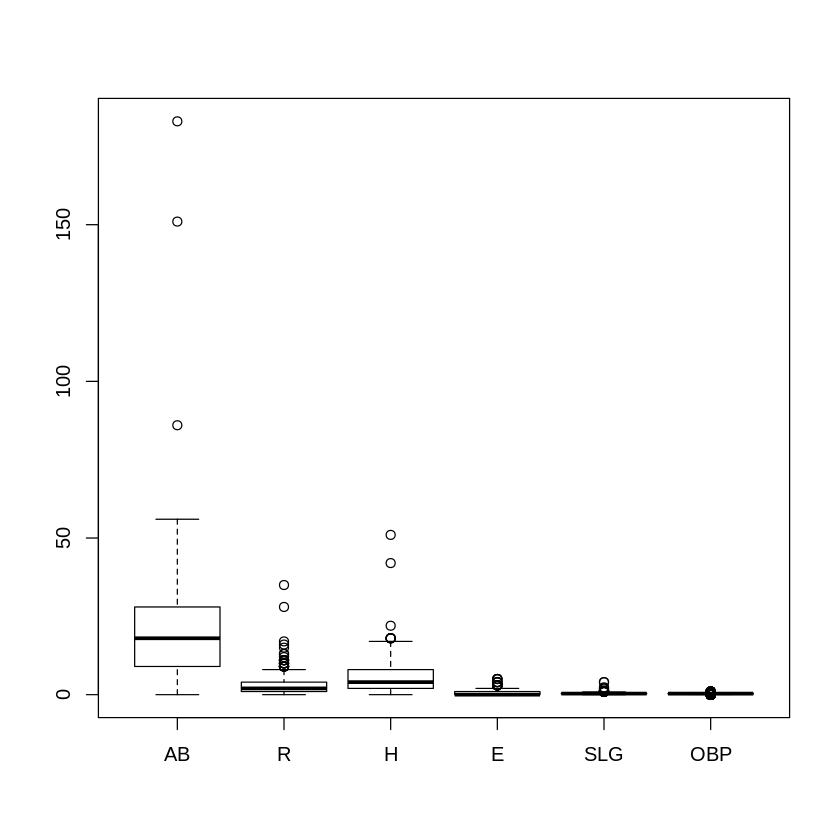

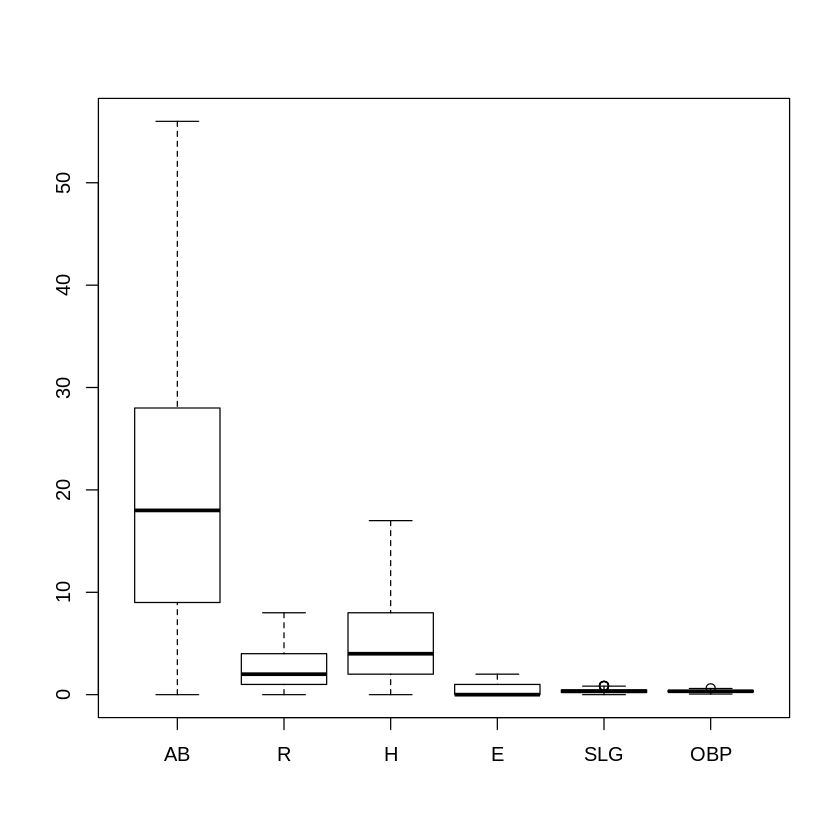

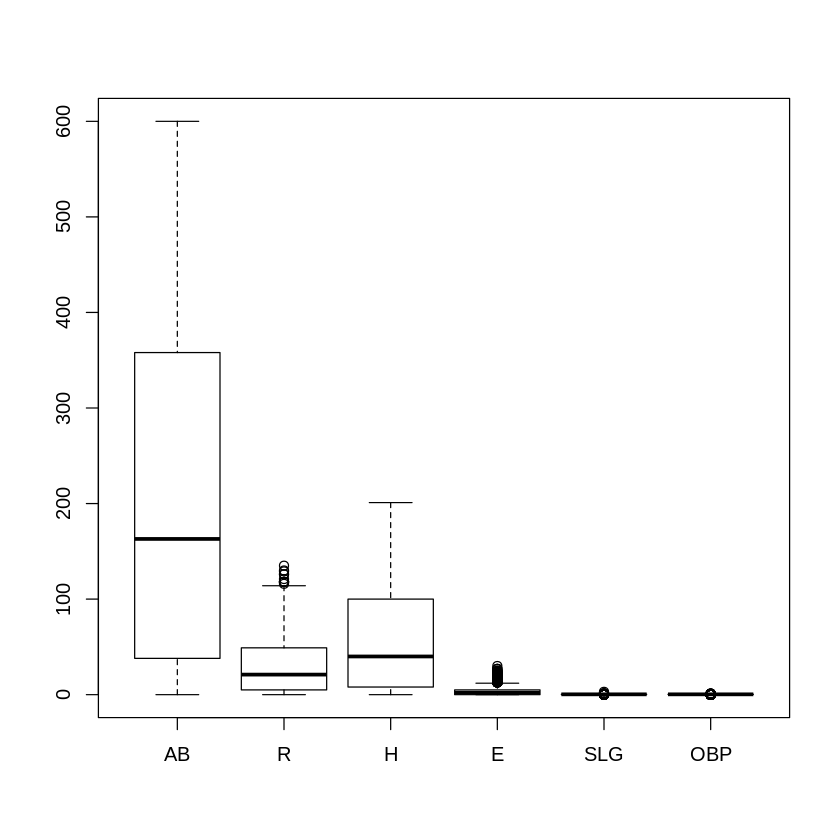

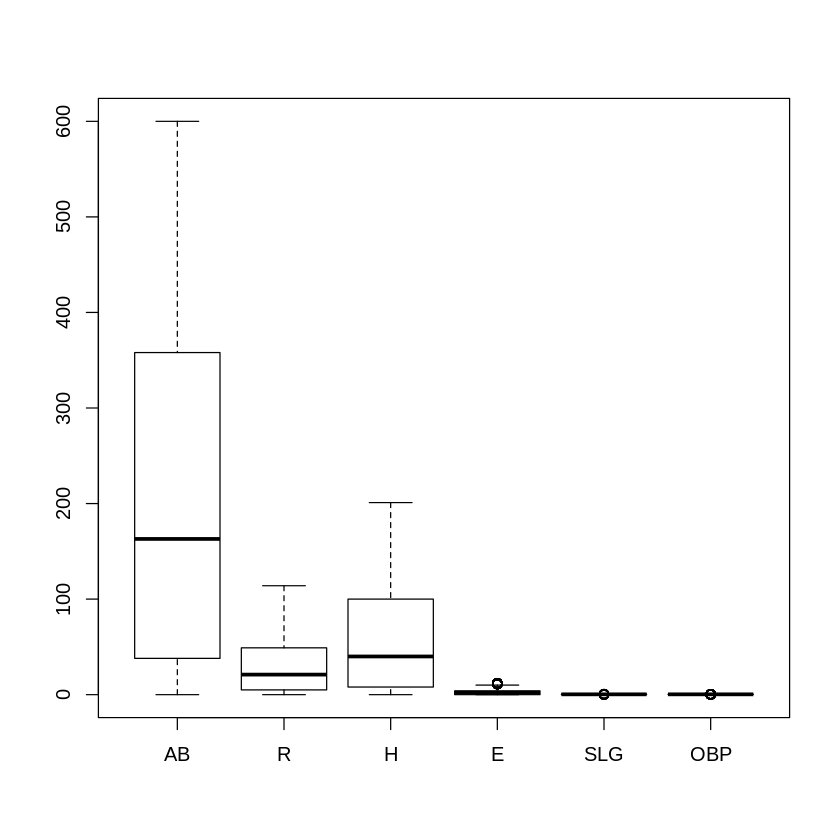

In [ ]:
# (2)
Pre_DF %>% boxplot()
removeOutliers(Pre_DF) %>% boxplot()
# (3)
Reg_DF %>% boxplot()
removeOutliers(Reg_DF) %>% boxplot()

### **4주차 과제**
- - -

* **1번 문제**

In [ ]:
#(1)  DF에서 문자형(chr) 열을 제외한 모든 열
DF <- fread("ftp://210.115.229.94/2020_datascience/6th_data/Pre_Season_Batter.csv") %>% as_tibble()

In [ ]:
DF %>% select_if(negate(is.character)) %>% show() #negate

# A tibble: 1,393 x 21
   batter_id  year     G    AB     R     H  `2B`  `3B`    HR    TB   RBI    SB
       <int> <int> <int> <int> <int> <int> <int> <int> <int> <int> <int> <int>
 1         0  2018     7    20     1     7     1     0     1    11     5     0
 2         1  2011     4     2     2     0     0     0     0     0     1     0
 3         1  2014     4     0     2     0     0     0     0     0     0     0
 4         1  2015    10    23     3     3     0     0     0     3     1     3
 5         1  2016    14    32     4     6     1     1     0     9     2     1
 6         1  2017    11    36    10     8     0     0     2    14     4     0
 7         2  2013     3     4     0     0     0     0     0     0     0     0
 8         2  2016     3     1     0     0     0     0     0     0     0     1
 9         2  2017     2     1     0     1     0     0     0     1     0     0
10        69  2006    10    15     0     3     0     0     0     3     3     0
# … with 1,383 more rows, and

In [ ]:
DF[sapply(DF, class) != "character"] %>% show()

# A tibble: 1,393 x 21
   batter_id  year     G    AB     R     H  `2B`  `3B`    HR    TB   RBI    SB
       <int> <int> <int> <int> <int> <int> <int> <int> <int> <int> <int> <int>
 1         0  2018     7    20     1     7     1     0     1    11     5     0
 2         1  2011     4     2     2     0     0     0     0     0     1     0
 3         1  2014     4     0     2     0     0     0     0     0     0     0
 4         1  2015    10    23     3     3     0     0     0     3     1     3
 5         1  2016    14    32     4     6     1     1     0     9     2     1
 6         1  2017    11    36    10     8     0     0     2    14     4     0
 7         2  2013     3     4     0     0     0     0     0     0     0     0
 8         2  2016     3     1     0     0     0     0     0     0     0     1
 9         2  2017     2     1     0     1     0     0     0     1     0     0
10        69  2006    10    15     0     3     0     0     0     3     3     0
# … with 1,383 more rows, and

In [ ]:
#(2)  DF에서 숫자형(int,dbl)열을 제외한 모든 열
DF %>% select_if(negate(is.numeric)) %>% show() 

# A tibble: 1,393 x 8
   batter_name team  avg   `height/weight` year_born position career
   <chr>       <chr> <chr> <chr>           <chr>     <chr>    <chr> 
 1 가르시아    LG    0.350 177cm/93kg      1985년 04… 내야수(우투우… 쿠바 Ci…
 2 강경학      한화  0.000 180cm/72kg      1992년 08… 내야수(우투좌… 광주대성초…
 3 강경학      한화  -     180cm/72kg      1992년 08… 내야수(우투좌… 광주대성초…
 4 강경학      한화  0.130 180cm/72kg      1992년 08… 내야수(우투좌… 광주대성초…
 5 강경학      한화  0.188 180cm/72kg      1992년 08… 내야수(우투좌… 광주대성초…
 6 강경학      한화  0.222 180cm/72kg      1992년 08… 내야수(우투좌… 광주대성초…
 7 강구성      NC    0.000 180cm/82kg      1993년 06… 외야수(우투좌… 관산초-부…
 8 강구성      NC    0.000 180cm/82kg      1993년 06… 외야수(우투좌… 관산초-부…
 9 강구성      NC    1.000 180cm/82kg      1993년 06… 외야수(우투좌… 관산초-부…
10 김태완      한화  0.200 189cm/105kg     1984년 01… 내야수(우투우… 양목초-신…
# … with 1,383 more rows, and 1 more variable: starting_salary <chr>


In [ ]:
options(warn = -1)
DF[sapply(DF, is_numeric) != TRUE] %>% show()

# A tibble: 1,393 x 8
   batter_name team  avg   `height/weight` year_born position career
   <chr>       <chr> <chr> <chr>           <chr>     <chr>    <chr> 
 1 가르시아    LG    0.350 177cm/93kg      1985년 04… 내야수(우투우… 쿠바 Ci…
 2 강경학      한화  0.000 180cm/72kg      1992년 08… 내야수(우투좌… 광주대성초…
 3 강경학      한화  -     180cm/72kg      1992년 08… 내야수(우투좌… 광주대성초…
 4 강경학      한화  0.130 180cm/72kg      1992년 08… 내야수(우투좌… 광주대성초…
 5 강경학      한화  0.188 180cm/72kg      1992년 08… 내야수(우투좌… 광주대성초…
 6 강경학      한화  0.222 180cm/72kg      1992년 08… 내야수(우투좌… 광주대성초…
 7 강구성      NC    0.000 180cm/82kg      1993년 06… 외야수(우투좌… 관산초-부…
 8 강구성      NC    0.000 180cm/82kg      1993년 06… 외야수(우투좌… 관산초-부…
 9 강구성      NC    1.000 180cm/82kg      1993년 06… 외야수(우투좌… 관산초-부…
10 김태완      한화  0.200 189cm/105kg     1984년 01… 내야수(우투우… 양목초-신…
# … with 1,383 more rows, and 1 more variable: starting_salary <chr>


In [ ]:
# (3) DF에서 team 이름이 "두산" 또는 "한화"이고 G가 10 이상인 모든 행(row)
DF %>% filter((team == "두산" | team == "한화") & G >= 10) %>% show()

# A tibble: 160 x 29
   batter_id batter_name  year team  avg       G    AB     R     H  `2B`  `3B`
       <int> <chr>       <int> <chr> <chr> <int> <int> <int> <int> <int> <int>
 1         1 강경학       2015 한화  0.130    10    23     3     3     0     0
 2         1 강경학       2016 한화  0.188    14    32     4     6     1     1
 3         1 강경학       2017 한화  0.222    11    36    10     8     0     0
 4        69 김태완       2006 한화  0.200    10    15     0     3     0     0
 5        69 김태완       2008 한화  0.375    10    24     3     9     1     0
 6        69 김태완       2009 한화  0.320    10    25     5     8     3     0
 7        69 김태완       2014 한화  0.125    10    16     1     2     0     0
 8         8 강상원       2017 한화  0.000    10     1     4     0     0     0
 9       162 신성현       2016 한화  0.286    14    35     6    10     1     0
10       162 신성현       2017 두산  0.324    10    34     7    11     2     0
# … with 150 more rows, and 18 more variables: HR <int>, TB <int>, RBI <int>,
#  

In [ ]:
# (4) DF에서 team  이름이 "두산", "한화"가 아니고 G가 10 이상이거나 OBP가 0.5 이상인 모든 행(row)
DF %>% filter((team != "두산" & team != "한화") & (G >= 10 | OBP >= .5)) %>% show()

# A tibble: 590 x 29
   batter_id batter_name  year team  avg       G    AB     R     H  `2B`  `3B`
       <int> <chr>       <int> <chr> <chr> <int> <int> <int> <int> <int> <int>
 1         2 강구성       2016 NC    0.000     3     1     0     0     0     0
 2         2 강구성       2017 NC    1.000     2     1     0     1     0     0
 3        69 김태완       2017 넥센  0.370    12    27     2    10     1     0
 4        69 김태완       2018 넥센  0.375     5     8     2     3     1     0
 5         3 강민국       2016 NC    0.316    16    19     2     6     2     1
 6         4 강민호       2005 롯데  0.250    11    20     2     5     4     0
 7         4 강민호       2007 롯데  0.136    10    22     2     3     0     0
 8         4 강민호       2010 롯데  0.261    10    23     8     6     1     0
 9         4 강민호       2011 롯데  0.353    13    34     4    12     3     0
10         4 강민호       2015 롯데  0.158    10    19     1     3     0     0
# … with 580 more rows, and 18 more variables: HR <int>, TB <int>, RBI <int

In [ ]:
# (5) DF에서 team 별 G, SLG, OBP, OPS 의 평균
DF %>% group_by(team) %>% summarise(G_AVG = mean(G, na.rm =  T), SLG_AVG = mean(SLG, na.rm = T), OBP_AVG = mean(OBP, na.rm = T), OPS_AVG = mean(OPS, na.rm = T)) %>% show()

# A tibble: 13 x 5
   team     G_AVG SLG_AVG OBP_AVG OPS_AVG
   <chr>    <dbl>   <dbl>   <dbl>   <dbl>
 1 KIA       7.87   0.407   0.358   0.765
 2 KT        7.63   0.373   0.320   0.693
 3 LG        8.74   0.350   0.321   0.667
 4 NC        8.49   0.401   0.312   0.705
 5 SK        8.37   0.350   0.305   0.655
 6 넥센      9.10   0.383   0.323   0.706
 7 두산     10.7    0.332   0.310   0.635
 8 롯데      8.21   0.378   0.322   0.700
 9 삼성      8.79   0.345   0.307   0.653
10 우리      7.33   0.208   0.194   0.402
11 한화      7.76   0.350   0.319   0.670
12 현대     10.1    0.297   0.270   0.568
13 히어로즈  8.2    0.253   0.289   0.542


In [ ]:
# (6) DF에서 team, batter_name 별 SLG, OBP 의 평균을 구하여 데이터프레임으로 만든다. 생성한 데이터프레임에서 batter_name이 "노로" 시작하고 SLG의 평균이 0.20 이상인 행
DF %>% group_by(team, batter_name) %>%
  summarise(SLG_AVG = mean(SLG, na.rm = T), OBP_AVG = mean(OBP, na.rm = T)) %>% 
  filter(stringr::str_starts(batter_name, "노") & SLG_AVG >= .2) %>% show()

# A tibble: 2 x 4
# Groups:   team [2]
  team  batter_name SLG_AVG OBP_AVG
  <chr> <chr>         <dbl>   <dbl>
1 NC    노진혁        0.206   0.198
2 SK    노수광        0.462   0.233


In [ ]:
DF %>% group_by(team, batter_name) %>%
  summarise(SLG_AVG = mean(SLG, na.rm = T), OBP_AVG = mean(OBP, na.rm = T)) %>% 
  filter(stringr::str_detect(batter_name, "^노") & SLG_AVG >= .2) %>% show()

# A tibble: 2 x 4
# Groups:   team [2]
  team  batter_name SLG_AVG OBP_AVG
  <chr> <chr>         <dbl>   <dbl>
1 NC    노진혁        0.206   0.198
2 SK    노수광        0.462   0.233


In [ ]:
DF %>% group_by(team, batter_name) %>%
  summarise(SLG_AVG = mean(SLG, na.rm = T), OBP_AVG = mean(OBP, na.rm = T)) %>% 
  filter(batter_name %like% "^노" & SLG_AVG >= .2) %>% show()

# A tibble: 2 x 4
# Groups:   team [2]
  team  batter_name SLG_AVG OBP_AVG
  <chr> <chr>         <dbl>   <dbl>
1 NC    노진혁        0.206   0.198
2 SK    노수광        0.462   0.233


- - -

* **2번 문제**

– apply 계열 함수와 반복문(for/wile)을 이용해서 group_by & summarise 를 대체해보자.

<사용되는 데이터 - Pre_Season_Batter.csv>

``DF %>% group_by(team) %>% summarise(G_AVG = mean(G), AB_AVG= mean(AB), R_SUM = sum(R))``

위의 코드처럼 group_by 와 summarise 를 이용하면 데이터프레임에서 그룹별로 평균 또는 합을 쉽게
구할 수 있다.
apply 계열 함수(lapply, sapply, ~) 또는 반복문을 사용해서 그룹별 평균 또는 합을 구해보자

<참고사항>
1. apply 계열 함수 또는 반복문을 사용할 것
2. 생성되는 데이터 프레임의 열(column)은 team, G_AVG(G 의 평균), AB_AVG(AB 의 평균),
R_SUM(R 의 합)
3. UDF(user defined function)을 사용하지 않아도 됨(사용한다면 function 의 이름은 자유)
4. Tip. select, filter, apply, t, bind_col 등 여러가지 함수가 사용될 수 있음(자유롭게 사용)

In [ ]:
tlist <- sort(unique(DF$team)) # DF 에 있는 team 열의 값을 unique 를 통해 중복을 제거하여 가져옵니다. 가져온 값은 sort 로 정렬해줍니다.
ret <- data.frame(team=c(), G_AVG=c(), AB_AVG=c(), R_SUM=c()) # 연산이 끝나고 나서 결과가 저장될 데이터 프레임을 생성합니다.
for(x in tlist) { # 팀 종류를 하나씩 가져와서 반복합니다.
# team 이 x 와 같은 행에서 team, G, AB, R 열만 추출하여 tmp 에 저장합니다.
  tmp <- DF %>% filter(., team == x) %>% select(., team, G, AB, R)
# bind_rows 로 결과 프레임에 행을 하나씩 붙여줍니다.
  ret <- bind_rows(ret, data.frame(team=unique(tmp$team), G_AVG=mean(tmp$G), AB_AVG=mean(tmp$AB), R_SUM=sum(tmp$R) ))
}
ret %>% as_tibble() %>% show()

# A tibble: 13 x 4
   team     G_AVG AB_AVG R_SUM
   <chr>    <dbl>  <dbl> <int>
 1 KIA       7.87   16.8   321
 2 KT        7.63   16.3   143
 3 LG        8.74   20.3   500
 4 NC        8.49   17     195
 5 SK        8.37   19.9   426
 6 넥센      9.10   19.0   315
 7 두산     10.7    22.1   601
 8 롯데      8.21   17.7   424
 9 삼성      8.79   20.1   416
10 우리      7.33   17.3    10
11 한화      7.76   18.2   335
12 현대     10.1    25.3    42
13 히어로즈  8.2    15.6     5


In [ ]:
# 다른 방법
DF1 <- DF %>% select(team, G, AB, R)

mat <- tapply(DF1[[2]], DF1$team, mean) # G
mat <- tapply(DF1[[3]], DF1$team, mean) %>% cbind(mat, .) # AB
mat <- tapply(DF1[[4]], DF1$team, sum) %>% cbind(mat, .)  # R

In [ ]:
mat %>% show()

               mat        .   .
KIA       7.871212 16.84091 321
KT        7.631579 16.33333 143
LG        8.741379 20.32759 500
NC        8.488636 17.00000 195
SK        8.372781 19.88166 426
넥센      9.098214 19.00893 315
두산     10.736559 22.09677 601
롯데      8.210843 17.74096 424
삼성      8.785235 20.06040 416
우리      7.333333 17.33333  10
한화      7.755725 18.24427 335
현대     10.055556 25.33333  42
히어로즈  8.200000 15.60000   5


In [ ]:
 mat <- tibble(team = row.names(mat)) %>% bind_cols(., as_tibble(mat)) 
 names <- c("team", "G_AVG", "AB_ABG", "R_SUM")
 colnames(mat) <- names
 mat %>% show()

# A tibble: 13 x 4
   team     G_AVG AB_ABG R_SUM
   <chr>    <dbl>  <dbl> <dbl>
 1 KIA       7.87   16.8   321
 2 KT        7.63   16.3   143
 3 LG        8.74   20.3   500
 4 NC        8.49   17     195
 5 SK        8.37   19.9   426
 6 넥센      9.10   19.0   315
 7 두산     10.7    22.1   601
 8 롯데      8.21   17.7   424
 9 삼성      8.79   20.1   416
10 우리      7.33   17.3    10
11 한화      7.76   18.2   335
12 현대     10.1    25.3    42
13 히어로즈  8.2    15.6     5
